---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [17]:
import numpy as np
import pandas as pd



/Users/Luke/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/Luke/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [3]:
def answer_one():
    
    # Your code here
    df = pd.read_csv('fraud_data.csv')
    #df = df.fillna({'Class':0}) # clean a certain column NAs
    frauds = df['Class'] == 1
    #print(len(df[frauds]))
    # print(df[frauds].head())
    return len(df[frauds]) / len(df) # or just use Mean of Class for df!
answer_one()

0.016410823768035772

In [4]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.cross_validation import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1] # all cols except last
y = df.iloc[:,-1] # ground truths

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [5]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    accuracy_sc = dummy_majority.score(X_test, y_test)
    y_predicted = dummy_majority.predict(X_test)
    recall_sc = recall_score(y_test, y_predicted)
    
    print(recall_sc)
    return (accuracy_sc, recall_sc)

answer_two()

0.0


(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [6]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svm = SVC().fit(X_train, y_train)
    accuracy_sc = svm.score(X_test, y_test)
    
    y_predicted = svm.predict(X_test)
    recall_sc = recall_score(y_test, y_predicted)
    precision_sc = precision_score(y_test, y_predicted)
    
    return (accuracy_sc, recall_sc, precision_sc) 
answer_three()

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [7]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    THRESHOLD = -220.0
    params = {'C': 10**9, 'gamma': 10**-7} 
    y_decisions = SVC(**params).fit(X_train, y_train).decision_function(X_test)
    
    #print(y_decisions)
    # this gives a modified set of predictions according to a unique threshold, shifting to 0 or 1
    y_pred = [0 if score < THRESHOLD else 1 for score in y_decisions]
    
    confusion = confusion_matrix(y_test, y_pred)
    
    return confusion

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

             precision    recall  f1-score   support

  not fraud       1.00      1.00      1.00      5344
      fraud       0.97      0.79      0.87        80

avg / total       1.00      1.00      1.00      5424



<IPython.core.display.Javascript object>


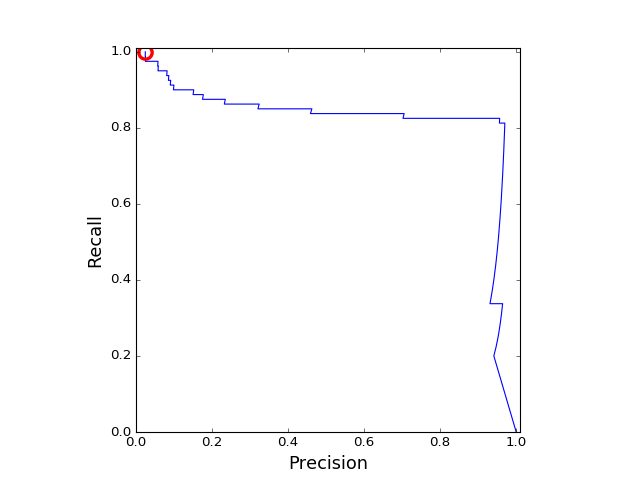

<IPython.core.display.Javascript object>


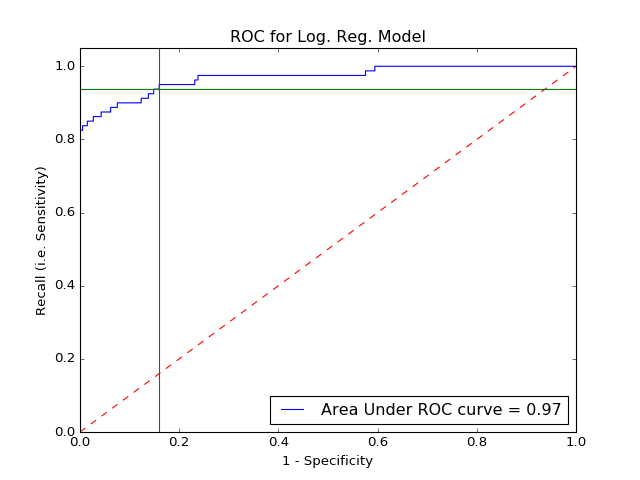

(0.825, 0.9375)

In [37]:
def answer_five():
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report


    lr = LogisticRegression().fit(X_train, y_train)
    lr_predicted = lr.predict(X_test)
    confusion = confusion_matrix(y_test, lr_predicted)
    #print(confusion)
    print(classification_report(y_test, lr_predicted, target_names=['not fraud', 'fraud']))
    
    y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
    y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
    #print(y_proba_lr[0:20, 1])
    
    # Precision Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba_lr[:,1])
    
    # this will plot the index on recall of the index when precision is 0.75
    #print(recall.shape)
    #print(recall[:20])
    recall_value = float(recall[np.where(precision==0.75)])
    
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]
    
    # %matplotlib inline
    import matplotlib.pyplot as plt
    
    # visual of P_R curve:
    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.show()

    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba_lr[:,1])
    
    true_positive_rate_value = tpr[np.where((fpr >= 0.1595) & (fpr <= 0.16))][0]
    roc_auc = auc(fpr,tpr)
    
    # visual of ROC curve:
    plt.figure()
    plt.plot(fpr, tpr, label='Area Under ROC curve = %.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'r--') # indicate a randomly guessing classifier performance 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc='lower right')
    plt.title('ROC for Log. Reg. Model')
    plt.xlabel('1 - Specificity')
    plt.ylabel('Recall (i.e. Sensitivity)')
    
    plt.axvline(x=0.16, color='g')
    plt.axhline(y=0.9375, color='g')
    plt.show()
    
    return (recall_value, float(true_positive_rate_value))

answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [ ]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    
    return # Return your answer

In [ ]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())